# Natural Language Processing: Classifying Social Media Sentiment

### Import Libraries

In [4]:
# Data Manipulation
import pandas as pd
from pydantic_settings import BaseSettings
# from pandas_profiling import ProfileReport
# Numerical Computing
import numpy as np
# Data Vissualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [5]:
tweet_df = pd.read_csv('/work/cleaned_airline_tweets.csv')
tweet_df.head()

,text,sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,"@VirginAmerica it was amazing, and arrived an ...",positive
2,@VirginAmerica I &lt;3 pretty graphics. so muc...,positive
3,@VirginAmerica So excited for my first cross c...,positive
4,I ❤️ flying @VirginAmerica. ☺️👍,positive


In [6]:
# profile = ProfileReport(tweet_df, title="Tweets Report", explorative=True)
# profile

In [7]:
# Only consider positive vs negative
# tweet_df = tweet_df[tweet_df['sentiment'].isin(['negative', 'positive'])]

In [8]:
tweet_df['sentiment'].value_counts(normalize=True)

positive    0.348705
neutral     0.336528
negative    0.314767
Name: sentiment, dtype: float64

### Splitting Data

In [9]:
train, test = train_test_split(tweet_df, test_size=0.2, random_state=0, stratify=tweet_df['sentiment'])

print(f'Count of tweets in training set: {train.shape[0]:,}')
print(f'Count of tweets in testing set: {test.shape[0]:,}')

Count of tweets in training set: 3,088
Count of tweets in testing set: 772


## Text Vectorization

### Count Vectorization

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate a CountVectorizer
cv = CountVectorizer()
single_word = cv.fit_transform(train['text'])

In [11]:
print(single_word.shape)

(3088, 6018)


In [12]:
# Set-up a DataFrame
pd.DataFrame(single_word.todense(), columns=cv.get_feature_names_out())

,00,000,000114,000ft,00pm,0167560070877,02,0200,03,0400,...,zacks_com,zakkohane,zero,zf5wjgtxzt,zgoqoxjbqy,zj76,zone,zsdgzydnde,zukes,zv2pt6trk9
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3083,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3084,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3085,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Count Vectorizing with a Limited Vocabulary

In [13]:
# Setting max_features chooses the most commin words
cv = CountVectorizer(max_features=20)
limited_vocab = cv.fit_transform(train['text'])

In [14]:
pd.DataFrame(limited_vocab.toarray(), index=train['text'],columns=cv.get_feature_names_out())

,americanair,and,flight,for,in,is,it,jetblue,me,my,of,on,southwestair,thanks,the,to,united,usairways,you,your
text,,,,,,,,,,,,,,,,,,,,
@JetBlue Maybe I'll just go to Cleveland instead.,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
smh RT @JetBlue: Our fleet's on fleek. http://t.co/IRiXaIfJJX,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
@SouthwestAir I would.,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
@USAirways trying to Cancelled Flight a flight urgently...get hung up on twice??? Sweet refund policy,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
@AmericanAir you are beyond redemption. Jfk. Baggage claim looks like a luggage warehouse,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
“@JetBlue: Our fleet's on fleek. http://t.co/b5ttno68xu” I just 🙈,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
"@united caught earlier flight to ORD. Gate checked bag, and you've lost it at O'Hare. original flight lands in 20minutes. #frustrating!",0,1,2,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0
@AmericanAir hi when will your next set of flights be out for next year from Dublin???,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


### Count Vectorizing on ngram_range

In [15]:
# Consider unigrams, bigrams and trigrams
cv = CountVectorizer(ngram_range=(1, 3))
more_ngrams = cv.fit_transform(train['text'])
print(more_ngrams.shape)

(3088, 70613)


In [16]:
pd.DataFrame(more_ngrams.toarray(), index=train['text'], columns=cv.get_feature_names_out())

,00,00 phone,00 phone hold,00 pm,00 pm that,000,000 air,000 air miles,000 crewmembers,000 crewmembers embody,...,zj76 how,zj76 how did,zone,zone was,zone was after,zsdgzydnde,zukes,zukes non,zukes non vegan,zv2pt6trk9
text,,,,,,,,,,,,,,,,,,,,,
@JetBlue Maybe I'll just go to Cleveland instead.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
smh RT @JetBlue: Our fleet's on fleek. http://t.co/IRiXaIfJJX,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
@SouthwestAir I would.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
@USAirways trying to Cancelled Flight a flight urgently...get hung up on twice??? Sweet refund policy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
@AmericanAir you are beyond redemption. Jfk. Baggage claim looks like a luggage warehouse,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
“@JetBlue: Our fleet's on fleek. http://t.co/b5ttno68xu” I just 🙈,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"@united caught earlier flight to ORD. Gate checked bag, and you've lost it at O'Hare. original flight lands in 20minutes. #frustrating!",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
@AmericanAir hi when will your next set of flights be out for next year from Dublin???,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Most Common Unigrams in Training Corpus

In [17]:
# Most common words in training set
cv = CountVectorizer(max_features=10)
cv.fit(train['text'])
cv.get_feature_names_out()

array(['and', 'flight', 'for', 'jetblue', 'on', 'southwestair', 'the',
       'to', 'united', 'you'], dtype=object)

### Removing Stop-Words

In [18]:
# Removing English Stop-Words
cv = CountVectorizer(stop_words='english', max_features=10)
cv.fit(train['text'])
cv.get_feature_names_out()

array(['americanair', 'flight', 'http', 'jetblue', 'service',
       'southwestair', 'thank', 'thanks', 'united', 'usairways'],
      dtype=object)

### Count Vectorizer's Pipeline

In [19]:
%run ./Base.ipynb

In [20]:
clf = LogisticRegression(max_iter=10000)  

ml_pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),  
    ('classifier', clf)
])

params = {
    'vectorizer__lowercase': [True, False],  
    'vectorizer__stop_words': [None, 'english'],
    'vectorizer__max_features': [100, 1000, 5000],
    'vectorizer__ngram_range': [(1, 1), (1, 3)],
    
    'classifier__C': [1e-1, 1e0, 1e1]  
    
}

print("Count Vectorizer + Log Reg\n=====================")
advanced_grid_search(  # D
    train['text'], train['sentiment'], test['text'], test['sentiment'], 
    ml_pipeline, params
)

Count Vectorizer + Log Reg
              precision    recall  f1-score   support

    negative       0.79      0.77      0.78       243
     neutral       0.75      0.78      0.77       260
    positive       0.84      0.83      0.84       269

    accuracy                           0.79       772
   macro avg       0.79      0.79      0.79       772
weighted avg       0.79      0.79      0.79       772

Best params: {'classifier__C': 1.0, 'vectorizer__lowercase': True, 'vectorizer__max_features': 5000, 'vectorizer__ngram_range': (1, 1), 'vectorizer__stop_words': None}
Overall took 106.41 seconds


(Pipeline(steps=[('vectorizer', CountVectorizer(max_features=5000)),
                 ('classifier', LogisticRegression(max_iter=10000))]),
 array(['negative', 'neutral', 'positive', 'neutral', 'neutral',
        'positive', 'neutral', 'negative', 'positive', 'negative',
        'neutral', 'negative', 'negative', 'neutral', 'neutral',
        'negative', 'negative', 'neutral', 'positive', 'negative',
        'positive', 'positive', 'neutral', 'negative', 'neutral',
        'negative', 'neutral', 'neutral', 'positive', 'neutral',
        'negative', 'neutral', 'neutral', 'neutral', 'positive',
        'negative', 'neutral', 'positive', 'neutral', 'positive',
        'positive', 'neutral', 'neutral', 'negative', 'neutral',
        'negative', 'negative', 'positive', 'negative', 'positive',
        'negative', 'negative', 'neutral', 'negative', 'positive',
        'positive', 'positive', 'neutral', 'positive', 'positive',
        'positive', 'negative', 'positive', 'positive', 'negative',

## TF-IDF Vectorization

- TF - IDF = TF(t, d) x IDF(t)

In [21]:
# tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=10)

# tfdf_text = tfidf_vectorizer.fit_transform(train['text'])
# pd.DataFrame(tfdf_text.toarray(), index = train['text'], columns = tfidf_vectorizer.get_feature_names_out())

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

fidf_vectorizer = TfidfVectorizer()  # A

fidf_vectorizer.fit(train['text'])

idf = pd.DataFrame({'feature_name':fidf_vectorizer.get_feature_names_out(), 'idf_weights':fidf_vectorizer.idf_})
idf.sort_values('idf_weights', ascending=True)

,feature_name,idf_weights
5401,to,1.932281
5316,the,2.163475
5983,you,2.288016
2419,for,2.375028
5608,united,2.497463
...,...,...
3460,lucas,8.342456
3461,lucia,8.342456
1320,cbv7f3kbkx,8.342456
3450,lowstandards,8.342456


In [24]:
# IDF for a term that appears once in a given tweet and once overall in the entire corpus
np.log((1 + train.shape[0]) / (1 + 1)) + 1

8.342455512358637

### TF-IDF 

In [25]:
ml_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),  
    ('classifier', clf)
])

print("TF-IDF Vectorizer + Log Reg\n=====================")
advanced_grid_search(
    train['text'], train['sentiment'], test['text'], test['sentiment'], 
    ml_pipeline, params  
)

TF-IDF Vectorizer + Log Reg
              precision    recall  f1-score   support

    negative       0.80      0.84      0.82       243
     neutral       0.82      0.80      0.81       260
    positive       0.89      0.87      0.88       269

    accuracy                           0.84       772
   macro avg       0.84      0.84      0.84       772
weighted avg       0.84      0.84      0.84       772

Best params: {'classifier__C': 1.0, 'vectorizer__lowercase': True, 'vectorizer__max_features': 5000, 'vectorizer__ngram_range': (1, 3), 'vectorizer__stop_words': None}
Overall took 112.98 seconds


(Pipeline(steps=[('vectorizer',
                  TfidfVectorizer(max_features=5000, ngram_range=(1, 3))),
                 ('classifier', LogisticRegression(max_iter=10000))]),
 array(['negative', 'neutral', 'positive', 'neutral', 'neutral',
        'positive', 'neutral', 'negative', 'positive', 'negative',
        'neutral', 'negative', 'negative', 'positive', 'neutral',
        'negative', 'negative', 'negative', 'positive', 'negative',
        'positive', 'positive', 'positive', 'negative', 'neutral',
        'negative', 'neutral', 'neutral', 'positive', 'neutral',
        'negative', 'neutral', 'neutral', 'positive', 'positive',
        'negative', 'neutral', 'positive', 'neutral', 'positive',
        'positive', 'neutral', 'neutral', 'negative', 'neutral',
        'negative', 'negative', 'positive', 'negative', 'positive',
        'negative', 'negative', 'negative', 'positive', 'positive',
        'positive', 'positive', 'neutral', 'positive', 'positive',
        'positive', 'neg

## Feature Improvement

In [26]:
import preprocessor as tweet_preprocessor

In [27]:
# # remove urls and mentions
# tweet_preprocessor.set_options(
#     tweet_preprocessor.OPT.URL, tweet_preprocessor.OPT.NUMBER
# )

# tweet_preprocessor.clean(
#     '@United is #awesome 👍 https://a.link/s/redirect 100%'
# )

In [28]:
# tweet_preprocessor.set_options(
#     tweet_preprocessor.OPT.URL, tweet_preprocessor.OPT.NUMBER
# )

# ml_pipeline = Pipeline([
#     ('vectorizer', TfidfVectorizer()),  # TfidfVectorizer gave us better results
#     ('classifier', clf)
# ])

# params = {
#     'vectorizer__lowercase': [True, False],
#     'vectorizer__stop_words': [None, 'english'],
#     'vectorizer__max_features': [100, 1000, 5000],
#     'vectorizer__ngram_range': [(1, 1), (1, 3)],
    
#     'classifier__C': [1e-1, 1e0, 1e1]  

# }

# print("Tweet Cleaning + Log Reg\n=====================")
# advanced_grid_search(
#     # apply cleaning here because it does not change given the training data
#     train['text'].apply(tweet_preprocessor.clean), train['sentiment'], 
#     test['text'].apply(tweet_preprocessor.clean), test['sentiment'], 
#     ml_pipeline, params
# )

### Standarizing Tokens

In [29]:
from nltk.stem import SnowballStemmer  

snowball_stemmer = SnowballStemmer(language='english')  

In [30]:
snowball_stemmer.stem('waiting')

'wait'

In [31]:
import nltk  
import re

nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [32]:
stemmed_stopwords = list(map(snowball_stemmer.stem, stopwords.words('english')))  

def stem_tokenizer(_input):  
    tokenized_words = re.sub(r"[^A-Za-z0-9\-]", " ", _input).lower().split()
    return [snowball_stemmer.stem(word) for word in tokenized_words if snowball_stemmer.stem(word) not in stemmed_stopwords]

stem_tokenizer('waiting for the plane')  

['wait', 'plane']

In [33]:
ml_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(tokenizer=stem_tokenizer)),  # A
    ('classifier', clf)
])

params = {
#     'vectorizer__lowercase': [True, False],
#     'vectorizer__stop_words': [],  # B
    
    'vectorizer__max_features': [100, 1000, 5000],
    'vectorizer__ngram_range': [(1, 1), (1, 3)],
    
    'classifier__C': [1e-1, 1e0, 1e1]  

}

print("Stemming + Log Reg\n=====================")
advanced_grid_search(
    # remove cleaning
    train['text'], train['sentiment'], 
    test['text'], test['sentiment'], 
    ml_pipeline, params
)

Stemming + Log Reg
              precision    recall  f1-score   support

    negative       0.80      0.81      0.80       243
     neutral       0.77      0.78      0.78       260
    positive       0.86      0.84      0.85       269

    accuracy                           0.81       772
   macro avg       0.81      0.81      0.81       772
weighted avg       0.81      0.81      0.81       772

Best params: {'classifier__C': 1.0, 'vectorizer__max_features': 5000, 'vectorizer__ngram_range': (1, 1)}
Overall took 57.66 seconds


(Pipeline(steps=[('vectorizer',
                  TfidfVectorizer(max_features=5000,
                                  tokenizer=<function stem_tokenizer at 0x7efdc11a7430>)),
                 ('classifier', LogisticRegression(max_iter=10000))]),
 array(['negative', 'neutral', 'positive', 'neutral', 'neutral',
        'positive', 'neutral', 'neutral', 'positive', 'negative',
        'neutral', 'negative', 'negative', 'neutral', 'neutral',
        'negative', 'negative', 'neutral', 'positive', 'negative',
        'positive', 'positive', 'positive', 'negative', 'neutral',
        'negative', 'neutral', 'neutral', 'positive', 'neutral',
        'negative', 'neutral', 'neutral', 'positive', 'positive',
        'negative', 'neutral', 'positive', 'neutral', 'positive',
        'positive', 'neutral', 'positive', 'negative', 'neutral',
        'negative', 'negative', 'negative', 'negative', 'positive',
        'negative', 'negative', 'negative', 'positive', 'positive',
        'positive', 'pos

## Feature Extraction

### Singular Value Decomposition

In [ ]:
from sklearn.decomposition import TruncatedSVD  # A

ml_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),  # B
    ('reducer', TruncatedSVD()),
    ('classifier', clf)
])

params = {
    'vectorizer__lowercase': [True, False],
    'vectorizer__stop_words': [None, 'english'],
    'vectorizer__max_features': [5000],
    'vectorizer__ngram_range': [(1, 3)],
    
    'reducer__n_components': [500, 1000, 1500, 2000],  # number of components to reduce to
    
    'classifier__C': [1e-1, 1e0, 1e1]

}

print("SVD + Log Reg\n=====================")
advanced_grid_search(
    train['text'], train['sentiment'], 
    test['text'], test['sentiment'], 
    ml_pipeline, params
)

SVD + Log Reg
              precision    recall  f1-score   support

    negative       0.79      0.84      0.82       243
     neutral       0.81      0.79      0.80       260
    positive       0.89      0.86      0.87       269

    accuracy                           0.83       772
   macro avg       0.83      0.83      0.83       772
weighted avg       0.83      0.83      0.83       772

Best params: {'classifier__C': 1.0, 'reducer__n_components': 2000, 'vectorizer__lowercase': True, 'vectorizer__max_features': 5000, 'vectorizer__ngram_range': (1, 3), 'vectorizer__stop_words': None}
Overall took 4783.95 seconds


(Pipeline(steps=[('vectorizer',
                  TfidfVectorizer(max_features=5000, ngram_range=(1, 3))),
                 ('reducer', TruncatedSVD(n_components=2000)),
                 ('classifier', LogisticRegression(max_iter=10000))]),
 array(['negative', 'neutral', 'positive', 'neutral', 'neutral',
        'positive', 'neutral', 'negative', 'positive', 'negative',
        'neutral', 'negative', 'negative', 'positive', 'neutral',
        'negative', 'negative', 'negative', 'positive', 'negative',
        'positive', 'positive', 'neutral', 'negative', 'neutral',
        'negative', 'neutral', 'neutral', 'positive', 'neutral',
        'negative', 'neutral', 'neutral', 'positive', 'positive',
        'negative', 'neutral', 'positive', 'neutral', 'positive',
        'positive', 'neutral', 'neutral', 'negative', 'neutral',
        'negative', 'negative', 'positive', 'negative', 'positive',
        'negative', 'negative', 'negative', 'positive', 'positive',
        'positive', 'positive

## Feature Learning

### Training an AutoEncoder

In [34]:
 # Fit a vectorizer on training data and transform training and test data
 vectorizer = TfidfVectorizer(**{
    'lowercase': True, 'max_features': 5000, 'ngram_range': (1, 3), 'stop_words': None
})

vectorized_X_train = vectorizer.fit_transform(train['text']).toarray()  
vectorized_X_test = vectorizer.transform(test['text']).toarray()  

In [35]:
vectorized_X_train.shape, vectorized_X_test.shape

((3088, 5000), (772, 5000))

### Building & Compiling The AutoEncoder

In [36]:
from keras.layers import Input, Dense      
from keras.models import Model, Sequential 
import tensorflow as tf                    

n_inputs = vectorized_X_train.shape[1]
n_bottleneck = 2000  

# Encoder
visible = Input(shape=(n_inputs,), name='input')
e = Dense(n_inputs//2, activation='relu', name='encoder')(visible)
# Bottleneck
bottleneck = Dense(n_bottleneck, name='bottleneck')(e)

# Decoder
d = Dense(n_inputs//2, activation='relu', name='decoder')(bottleneck)
# Output layer
output = Dense(n_inputs, activation='relu', name='output')(d)

# Define autoencoder model
autoencoder = Model(inputs=visible, outputs=output)


autoencoder.compile(optimizer='adam', loss='mse')  

2024-01-14 17:43:19.947123: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-14 17:43:20.077245: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-14 17:43:20.081688: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-01-14 17:43:20.081708: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

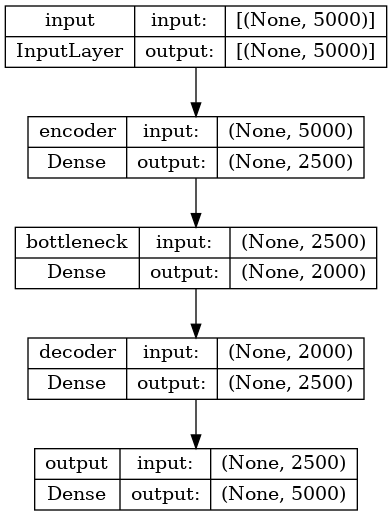

In [37]:
from keras.utils.vis_utils import plot_model

plot_model(autoencoder, to_file='autoencoder.png', show_shapes=True, show_layer_names=True)

### Fitting The AutoEncoder

Epoch 1/100
6/6 [==============================] - 3s 392ms/step - loss: 2.0869e-04 - val_loss: 2.0064e-04
Epoch 2/100
6/6 [==============================] - 2s 379ms/step - loss: 1.9914e-04 - val_loss: 1.9775e-04
Epoch 3/100
6/6 [==============================] - 2s 381ms/step - loss: 1.9719e-04 - val_loss: 1.9688e-04
Epoch 4/100
6/6 [==============================] - 2s 381ms/step - loss: 1.9652e-04 - val_loss: 1.9666e-04
Epoch 5/100
6/6 [==============================] - 2s 381ms/step - loss: 1.9630e-04 - val_loss: 1.9654e-04
Epoch 6/100
6/6 [==============================] - 2s 382ms/step - loss: 1.9612e-04 - val_loss: 1.9640e-04
Epoch 7/100
6/6 [==============================] - 2s 382ms/step - loss: 1.9594e-04 - val_loss: 1.9627e-04
Epoch 8/100
6/6 [==============================] - 2s 381ms/step - loss: 1.9577e-04 - val_loss: 1.9616e-04
Epoch 9/100
6/6 [==============================] - 2s 381ms/step - loss: 1.9561e-04 - val_loss: 1.9604e-04
Epoch 10/100
6/6 [===================

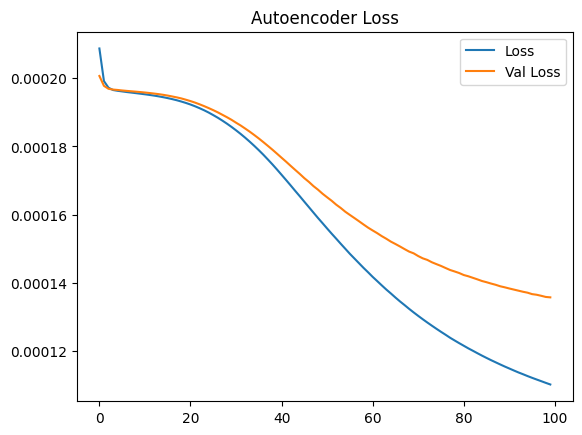

In [38]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)  

# B
autoencoder_history = autoencoder.fit(vectorized_X_train, vectorized_X_train, 
                batch_size = 512, epochs = 100,  callbacks=[early_stopping_callback],
                shuffle = True, validation_split = 0.10)


plt.plot(autoencoder_history.history['loss'], label='Loss')
plt.plot(autoencoder_history.history['val_loss'], label='Val Loss')

plt.title('Autoencoder Loss')
plt.legend()

### Using AutoEncoder for Classification

In [39]:
latent_representation = Model(inputs=visible, outputs=bottleneck)  

encoded_X_train = latent_representation.predict(vectorized_X_train)  
encoded_X_test = latent_representation.predict(vectorized_X_test)  


ml_pipeline = Pipeline([
    ('classifier', clf)
])

params = {
    'classifier__C': [1e-1, 1e0, 1e1]  
}

print("Autoencoder + Log Reg\n=====================")
advanced_grid_search(
    encoded_X_train, train['sentiment'], encoded_X_test, test['sentiment'], 
    ml_pipeline, params
)

25/25 [==============================] - 0s 5ms/step
Autoencoder + Log Reg
              precision    recall  f1-score   support

    negative       0.75      0.81      0.78       243
     neutral       0.78      0.77      0.77       260
    positive       0.86      0.80      0.83       269

    accuracy                           0.79       772
   macro avg       0.80      0.79      0.79       772
weighted avg       0.80      0.79      0.79       772

Best params: {'classifier__C': 1.0}
Overall took 22.96 seconds


(Pipeline(steps=[('classifier', LogisticRegression(max_iter=10000))]),
 array(['negative', 'neutral', 'positive', 'neutral', 'neutral',
        'positive', 'neutral', 'negative', 'positive', 'negative',
        'neutral', 'negative', 'negative', 'positive', 'negative',
        'negative', 'negative', 'negative', 'positive', 'negative',
        'positive', 'positive', 'neutral', 'negative', 'neutral',
        'negative', 'neutral', 'neutral', 'positive', 'neutral',
        'positive', 'neutral', 'neutral', 'positive', 'positive',
        'negative', 'neutral', 'positive', 'neutral', 'positive',
        'positive', 'neutral', 'neutral', 'negative', 'neutral',
        'negative', 'negative', 'negative', 'negative', 'positive',
        'negative', 'negative', 'negative', 'negative', 'positive',
        'positive', 'positive', 'neutral', 'positive', 'positive',
        'positive', 'negative', 'neutral', 'positive', 'negative',
        'negative', 'positive', 'positive', 'negative', 'negativ

# Introduction to Transfer Learning

## Getting Started with Bert

In [40]:
from transformers import BertTokenizer, BertModel  
import torch

bert_model = BertModel.from_pretrained('bert-base-uncased')  

bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')  

tweet = 'I hate this airline'

token_ids = torch.tensor(bert_tokenizer.encode(tweet)).unsqueeze(0)  

bert_model(token_ids)[1].shape  

torch.Size([1, 768])

### Vectorizing with BERT

In [41]:
from tqdm import tqdm
import numpy as np

def batch_embed_text(bert_model, tokenizer, text_iterable, batch_size=256):
    ''' This helper method will batch embed an iterable of text using a given tokenizer and bert model '''
    encoding = tokenizer.batch_encode_plus(text_iterable, padding=True)
    input_ids = np.vstack(encoding['input_ids'])
    attention_mask = np.vstack(encoding['attention_mask'])
    
    def batch_array_idx(np_array, batch_size):
        for i in tqdm(range(0, np_array.shape[0], batch_size)):
            yield i, i + batch_size
            
    embedded = None

    for start_idx, end_idx in batch_array_idx(input_ids, batch_size=batch_size):
        batch_bert = bert_model(
            torch.tensor(input_ids[start_idx:end_idx]), 
            attention_mask=torch.tensor(attention_mask[start_idx:end_idx])
        )[1].detach().numpy()
        if embedded is None:
            embedded = batch_bert
        else:
            embedded = np.vstack([embedded, batch_bert])

    return embedded

bert_X_train = batch_embed_text(bert_model, bert_tokenizer, train['text'])

bert_X_test = batch_embed_text(bert_model, bert_tokenizer, test['text'])

100%|██████████| 4/4 [00:21<00:00,  5.34s/it]


### Classification with BERT

In [42]:
ml_pipeline = Pipeline([
    ('classifier', clf)
])

params = {
    'classifier__C': [1e-1, 1e0, 1e1]  
}

print("BERT + Log Reg\n=====================")
advanced_grid_search(
    bert_X_train, train['sentiment'], bert_X_test, test['sentiment'], 
    ml_pipeline, params
)

BERT + Log Reg
              precision    recall  f1-score   support

    negative       0.85      0.86      0.85       243
     neutral       0.81      0.82      0.82       260
    positive       0.88      0.86      0.87       269

    accuracy                           0.85       772
   macro avg       0.85      0.85      0.85       772
weighted avg       0.85      0.85      0.85       772

Best params: {'classifier__C': 1.0}
Overall took 81.08 seconds


(Pipeline(steps=[('classifier', LogisticRegression(max_iter=10000))]),
 array(['negative', 'neutral', 'positive', 'neutral', 'neutral', 'neutral',
        'neutral', 'negative', 'positive', 'negative', 'neutral',
        'negative', 'negative', 'neutral', 'neutral', 'negative',
        'negative', 'neutral', 'positive', 'negative', 'neutral',
        'positive', 'negative', 'negative', 'neutral', 'negative',
        'positive', 'neutral', 'negative', 'neutral', 'negative',
        'neutral', 'neutral', 'positive', 'positive', 'positive',
        'negative', 'positive', 'neutral', 'positive', 'positive',
        'neutral', 'neutral', 'negative', 'neutral', 'negative',
        'negative', 'positive', 'negative', 'positive', 'negative',
        'negative', 'negative', 'positive', 'positive', 'positive',
        'positive', 'positive', 'positive', 'positive', 'positive',
        'negative', 'positive', 'positive', 'negative', 'negative',
        'positive', 'positive', 'negative', 'negativ

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d4996550-e852-4d9c-8201-666ba9542ff7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>